In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#exceção Cross Validation do sklearn
from sklearn.model_selection import cross_val_score 

from g_ml.utilidades.processamento import treino_teste
from g_ml.utilidades.processamento import escala_padrao

from g_ml.utilidades.metricas import ACC
from g_ml.utilidades.metricas import relatorio_classificacao
from g_ml.utilidades.metricas import ValCruzada

from g_ml.algoritmos.classificacao import RegressaoLogistica
from g_ml.algoritmos.classificacao import ADG
from g_ml.algoritmos.classificacao import NaiveBayesGaussiano







In [2]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [3]:
# Separação em treino e teste
X_treino, X_teste, y_treino, y_teste = treino_teste(X, y, tamanho_teste = 0.33)

In [4]:
escalador_X = escala_padrao()

escalador_X.fit(X_treino)

X_treino_escalado = escalador_X.transform(X_treino)
X_teste_escalado = escalador_X.transform(X_teste)

In [5]:
## Modelo dumb para baseline

In [6]:
np.unique(y_treino, return_counts=True)

(array([0, 1]), array([139, 243], dtype=int64))

In [7]:
y_base = np.ones(len(y_teste))
print("A acurácia base de um modelo inocente é: {}".format(ACC(y_base, y_teste)))

A acurácia base de um modelo inocente é: 0.6096256684491979


# Regressão Logística com Gradiente Descendente

In [8]:
RL = RegressaoLogistica()
RL.fit(X_treino_escalado, y_treino)
y_pred = RL.predict(X_teste_escalado)
print(ACC(y_teste,y_pred))


0.893048128342246


In [9]:
RL.w

array([-1.23257333, -1.29495405, -1.58762551, -1.71405192, -1.3975363 ,
       -1.71375507, -1.52803946, -1.15309495, -1.10503434, -1.28796851,
       -1.3008362 , -0.83312487, -1.50137548, -1.49017769, -1.65350628,
       -1.25612317, -1.53104254, -1.56314595, -1.64458859, -1.61282905,
       -1.06503691, -1.07224119, -0.824683  , -1.11048295, -1.40307918,
       -1.25994779, -1.0227527 , -0.93727722, -1.063927  , -1.008458  ,
       -1.62022799])

In [10]:
scores = relatorio_classificacao(y_pred, y_teste)

In [11]:
scores.print_scores()

A acurácia do modelo é de: 0.893048128342246 
A precisão do modelo é de: 0.9607843137254902
A revocacão do modelo é de: 0.8596491228070176
O f1_score do modelo é de: 0.9074074074074074


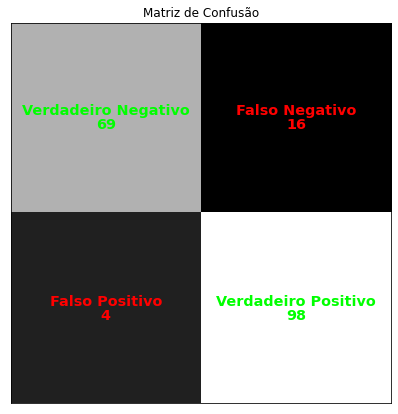

In [12]:
scores.plot_scores()

In [13]:
## TESTE
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_treino_escalado, y_treino)
y_pred2 = model.predict(X_teste_escalado)
print(accuracy_score(y_pred2,y_teste))

0.9893048128342246


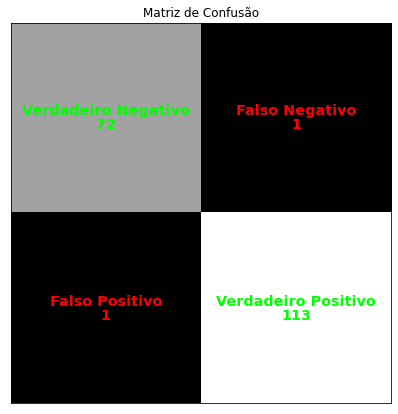

In [14]:
scores = relatorio_classificacao(y_pred2, y_teste)
scores.plot_scores()


**Regressão Logística utilizando VALIDAÇÃO CRUZADA**

Obs: Ao reutilizar o objeto vc usamos os mesmos indices para outros X com o mesmo tamanho e outros modelos. 

In [15]:
vc = ValCruzada(X_treino, part= 10)
vc.particionar(X_treino_escalado, y_treino)
vc.medir(RegressaoLogistica())

Acurácia média é: 0.8691632928475034 e seu desvio padrão é: 0.03503506118202565 
Precisão média é: 0.9245334719858118 e seu desvio padrão é: 0.031770378917291925 
Revocacão média é: 0.861016939582157 e seu desvio padrão é: 0.06329111901970903 
F1_score médio é: 0.8900897467985402 e seu desvio padrão é: 0.03644955770755969 


..\g_ml\algoritmos\classificacao.py:22: RuntimeWarning: divide by zero encountered in log
  custo =  np.mean(-y * np.log(y_pred) - (1-y) * np.log(1 - y_pred))


# Análise de Discriminante Gaussiano

In [16]:
adg = ADG()
adg.fit(X_treino_escalado, y_treino)
y_pred = adg.predict(X_teste_escalado)
print(ACC(y_pred, y_teste))

0.9572192513368984


In [17]:
scores = relatorio_classificacao(y_pred, y_teste)
scores.print_scores()

A acurácia do modelo é de: 0.9572192513368984 
A precisão do modelo é de: 0.9649122807017544
A revocacão do modelo é de: 0.9649122807017544
O f1_score do modelo é de: 0.9649122807017544


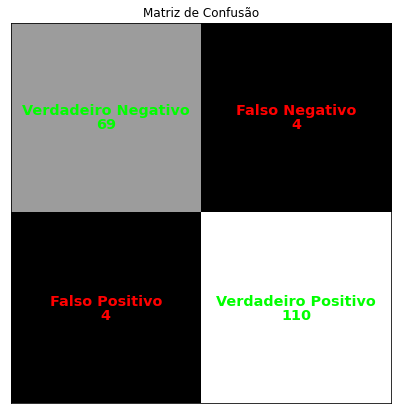

In [18]:
scores.plot_scores()

**ADG utilizando VALIDAÇÃO CRUZADA**

In [19]:
#vc = ValCruzada(X_treino, part= 10)
#vc.particionar(X_treino_escalado, y_treino)
vc.medir(ADG())

Acurácia média é: 0.9582995951417004 e seu desvio padrão é: 0.028679923685799035 
Precisão média é: 0.9747503840245777 e seu desvio padrão é: 0.030024392505398068 
Revocacão média é: 0.9563562958780351 e seu desvio padrão é: 0.03548457280683571 
F1_score médio é: 0.9650949022931925 e seu desvio padrão é: 0.026916661970866486 


# Naive Bayes Gaussiano

In [20]:
nbg = NaiveBayesGaussiano()
nbg.fit(X_treino_escalado, y_treino)
y_pred = nbg.predict(X_teste_escalado)
print(ACC(y_pred, y_teste))


0.9625668449197861


In [21]:
scores = relatorio_classificacao(y_pred, y_teste)
scores.print_scores()

A acurácia do modelo é de: 0.9625668449197861 
A precisão do modelo é de: 0.9572649572649573
A revocacão do modelo é de: 0.9824561403508771
O f1_score do modelo é de: 0.9696969696969696


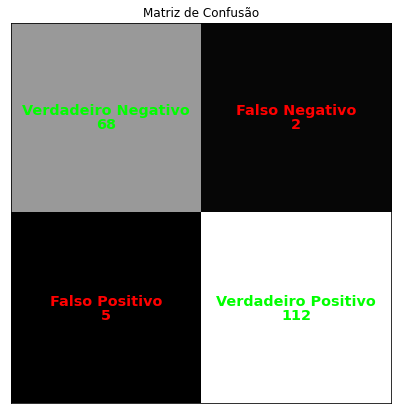

In [22]:
scores.plot_scores()

**NaiveBayesGaussiano utilizando VALIDAÇÃO CRUZADA**

In [23]:
#vc = ValCruzada(X_treino, part= 10)
#vc.particionar(X_treino_escalado, y_treino)
vc.medir(NaiveBayesGaussiano())

Acurácia média é: 0.9294871794871794 e seu desvio padrão é: 0.030670595628560688 
Precisão média é: 0.9363374346551065 e seu desvio padrão é: 0.04087305695479279 
Revocacão média é: 0.9536636551853943 e seu desvio padrão é: 0.0340112355906673 
F1_score médio é: 0.9440718516918342 e seu desvio padrão é: 0.025477820311217494 


# KNN